In [1]:
import sys
dirname = '/Users/m.daffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

from scipy import linalg
from smt.utils.misc import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock, CantileverBeam, MixedCantileverBeam, \
NdimRosenbrock, TorsionVibration, WaterFlowLFidelity, RobotArm, HierarchicalNeuralNetwork, WingWeight
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP

#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

import scipy.interpolate


import numpy as np

from smt.explainability_tools._partial_dependence import partial_dependence
from smt.explainability_tools._plot.partial_dependence import PartialDependenceDisplay


In [2]:
ndim = 3
ndoe = 100 #int(10*ndim)
# fun = Rosenbrock(ndim=ndim)
# fun = NdimRosenbrock(ndim=ndim)
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
X = sampling(ndoe)
y = fun(X)

kriging_model = KRG(theta0=[1e-2]*X.shape[1],print_prediction = False)
kriging_model.set_training_values(X, y)

kriging_model.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 100
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  1.0339389


In [3]:
# model = kriging_model
# features = [0, 1, 2, 3, 8, (0, 8)]
# pd_results = partial_dependence(model, X, features, grid_resolution=20, kind="individual")

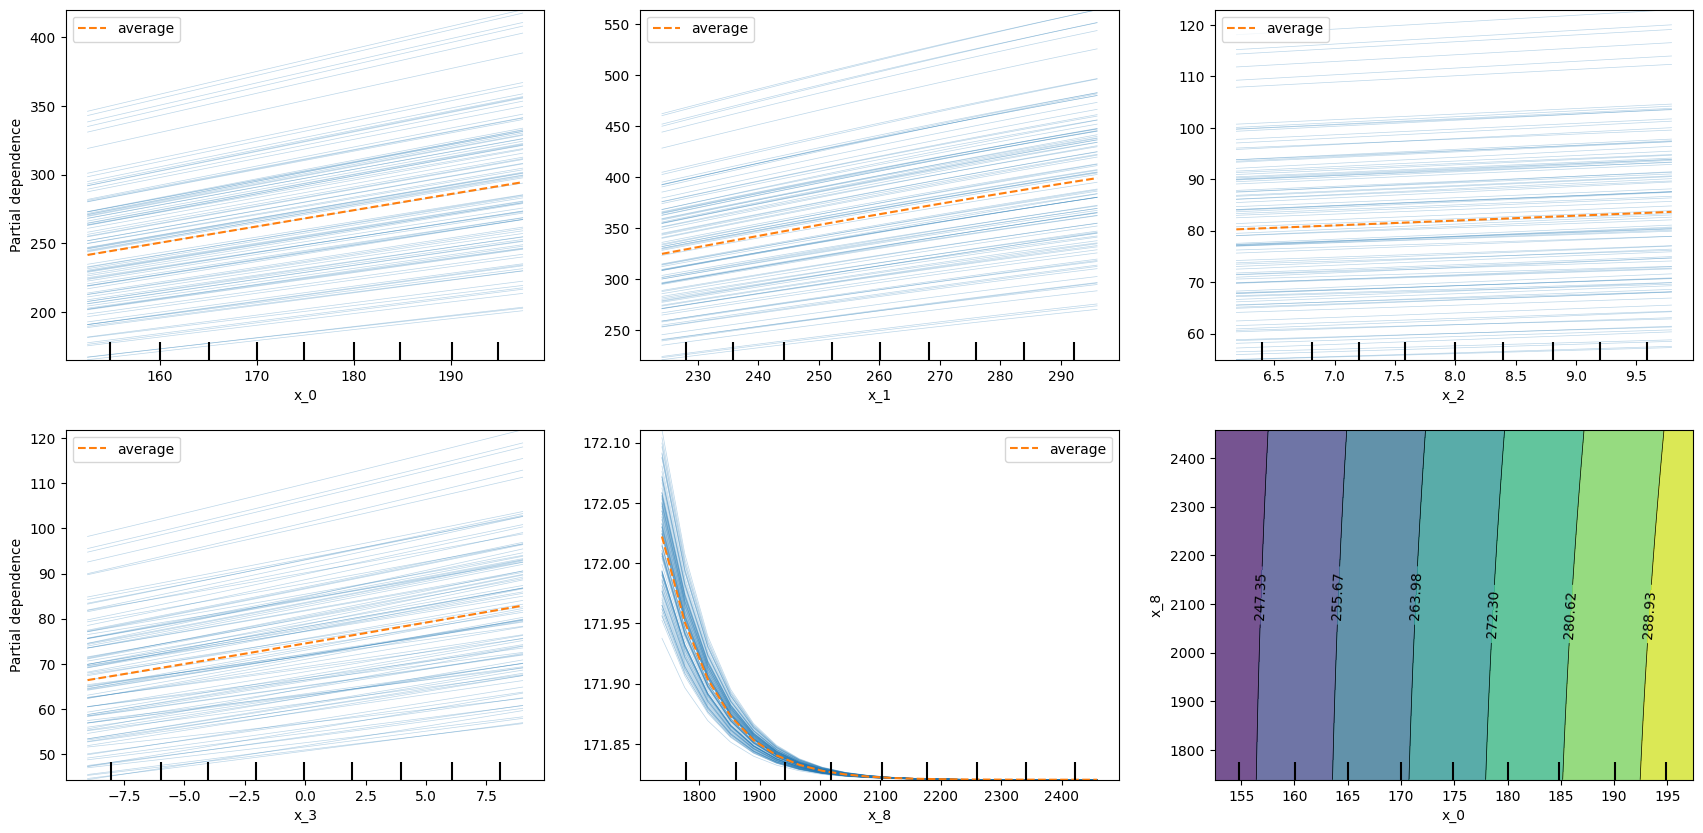

In [3]:
# pdd = PartialDependenceDisplay(pd_results=pd_results)
# pdd.plot()
model = kriging_model
features = [0, 1, 2, 3, 8, (0, 8)]
pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='both')

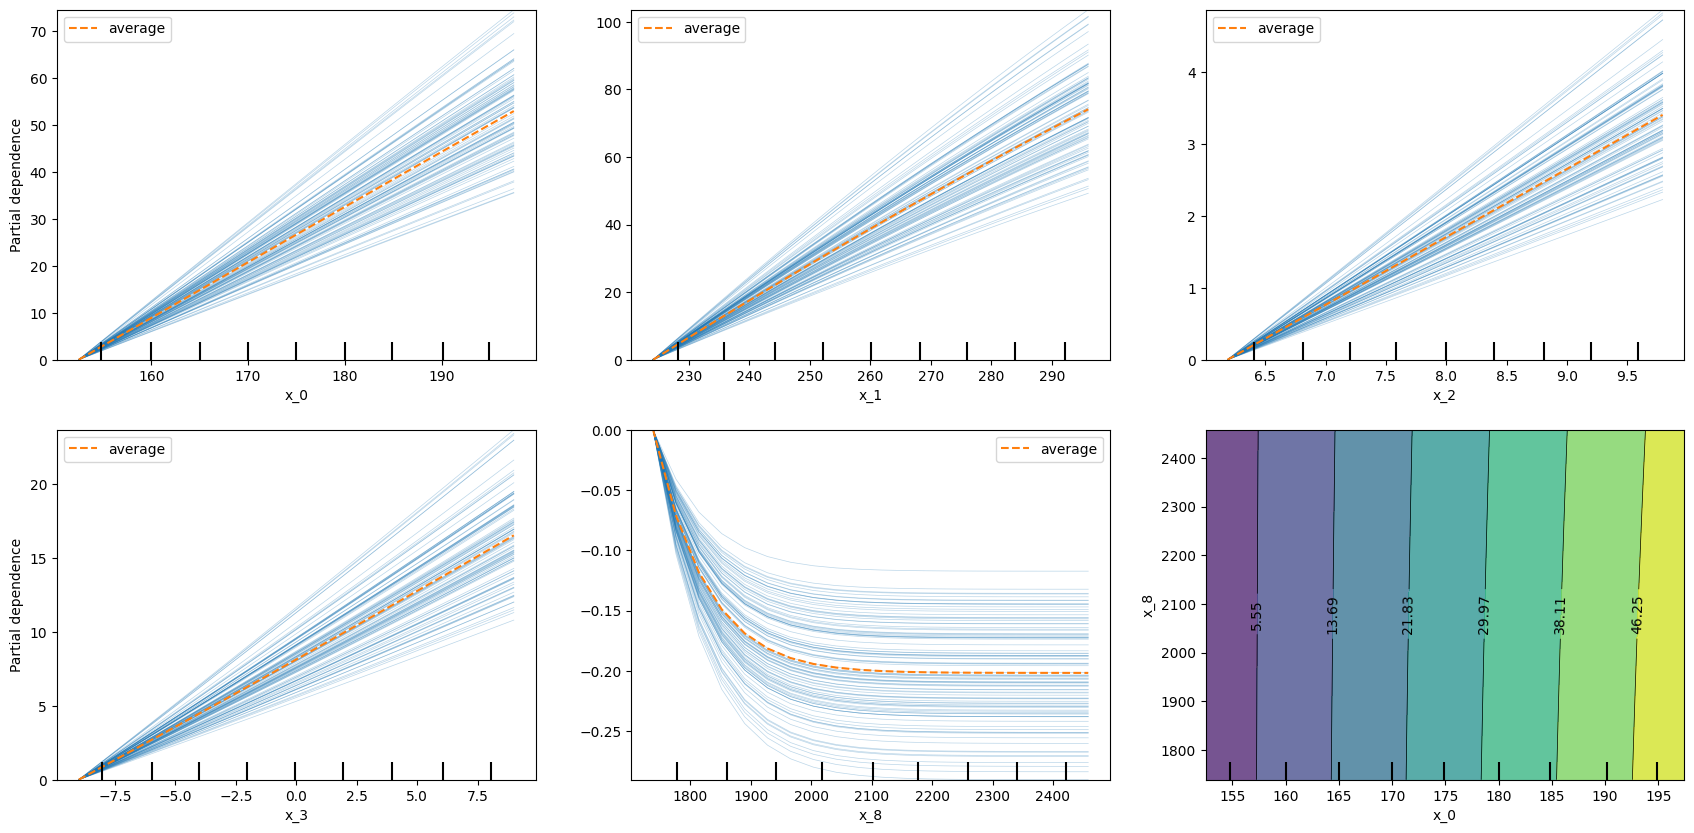

In [4]:
model = kriging_model
features = [0, 1, 2, 3, 8, (0, 8)]
pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='both', centered=True)

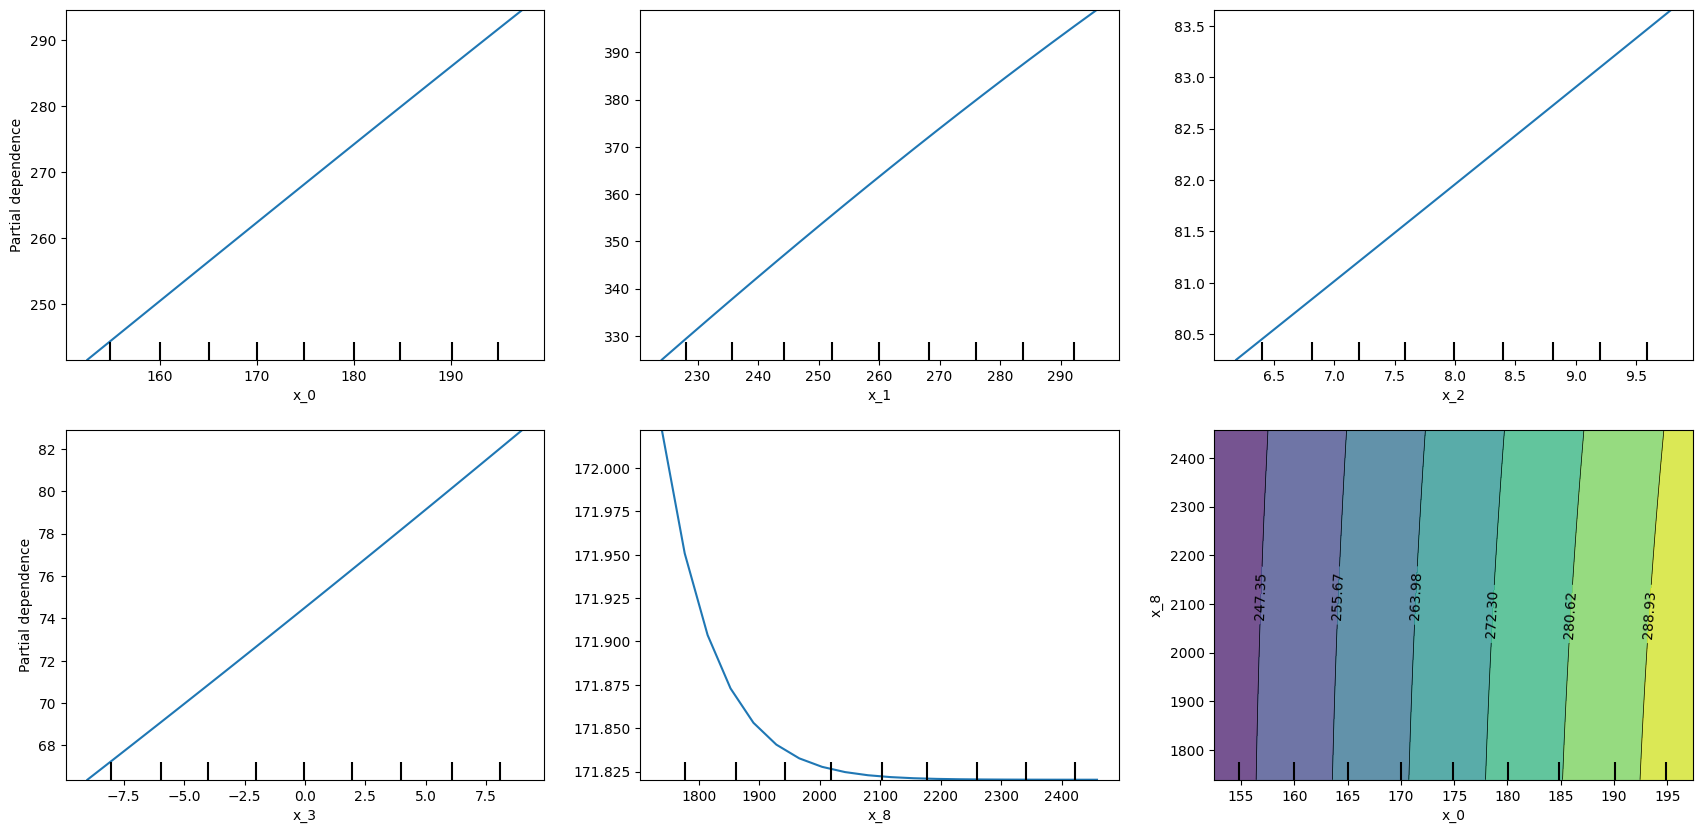

In [5]:
model = kriging_model
features = [0, 1, 2, 3, 8, (0, 8)]
pdd= PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='average')

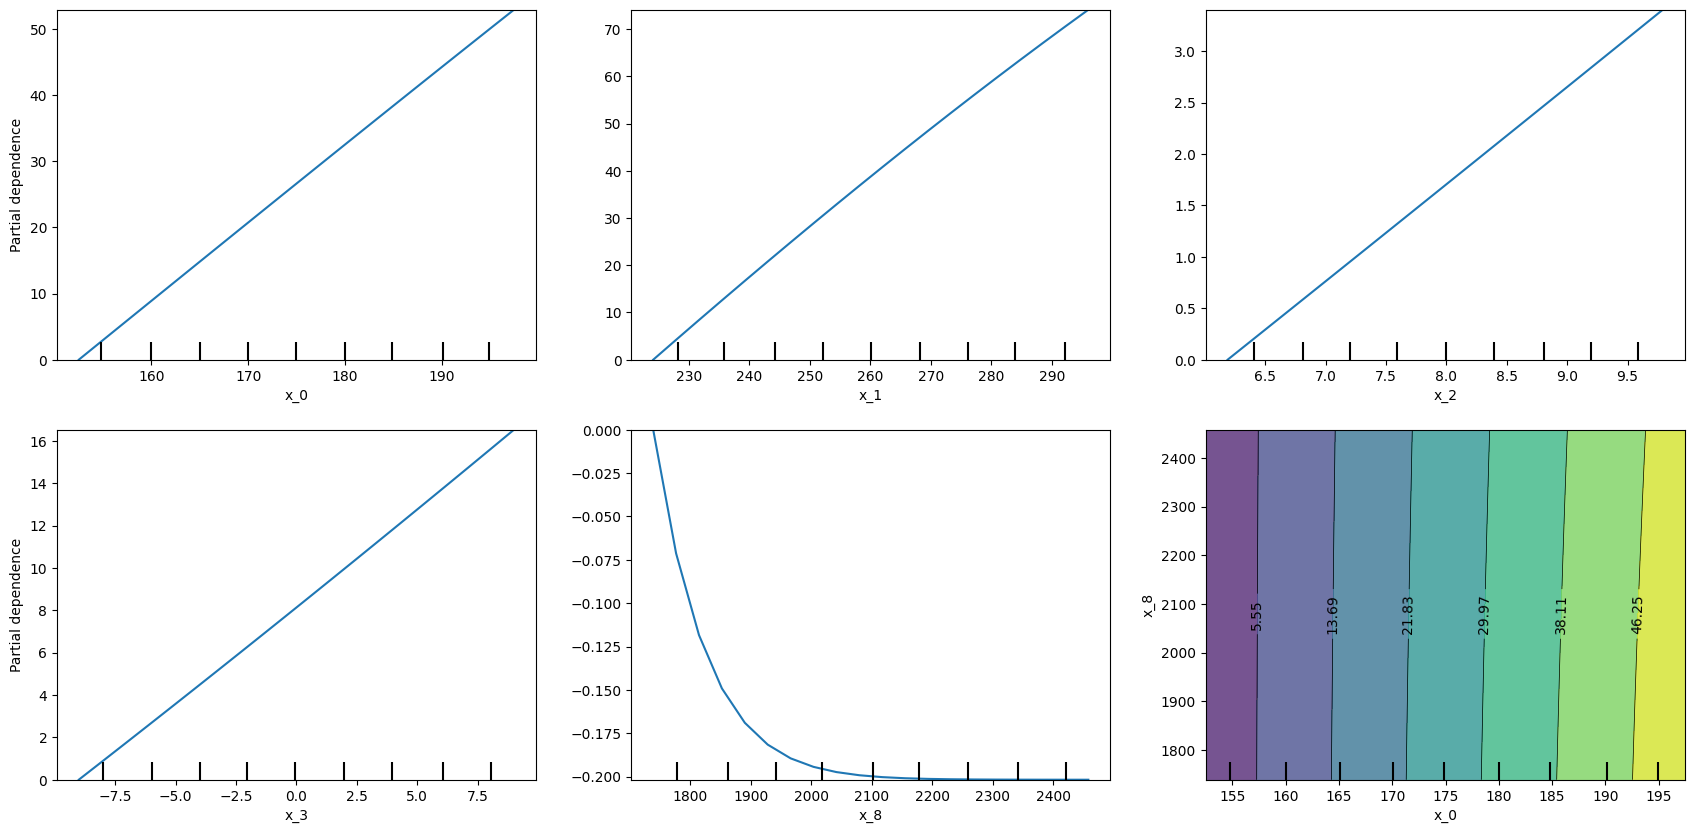

In [6]:
model = kriging_model
features = [0, 1, 2, 3, 8, (0, 8)]
pdd= PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='average', centered=True)

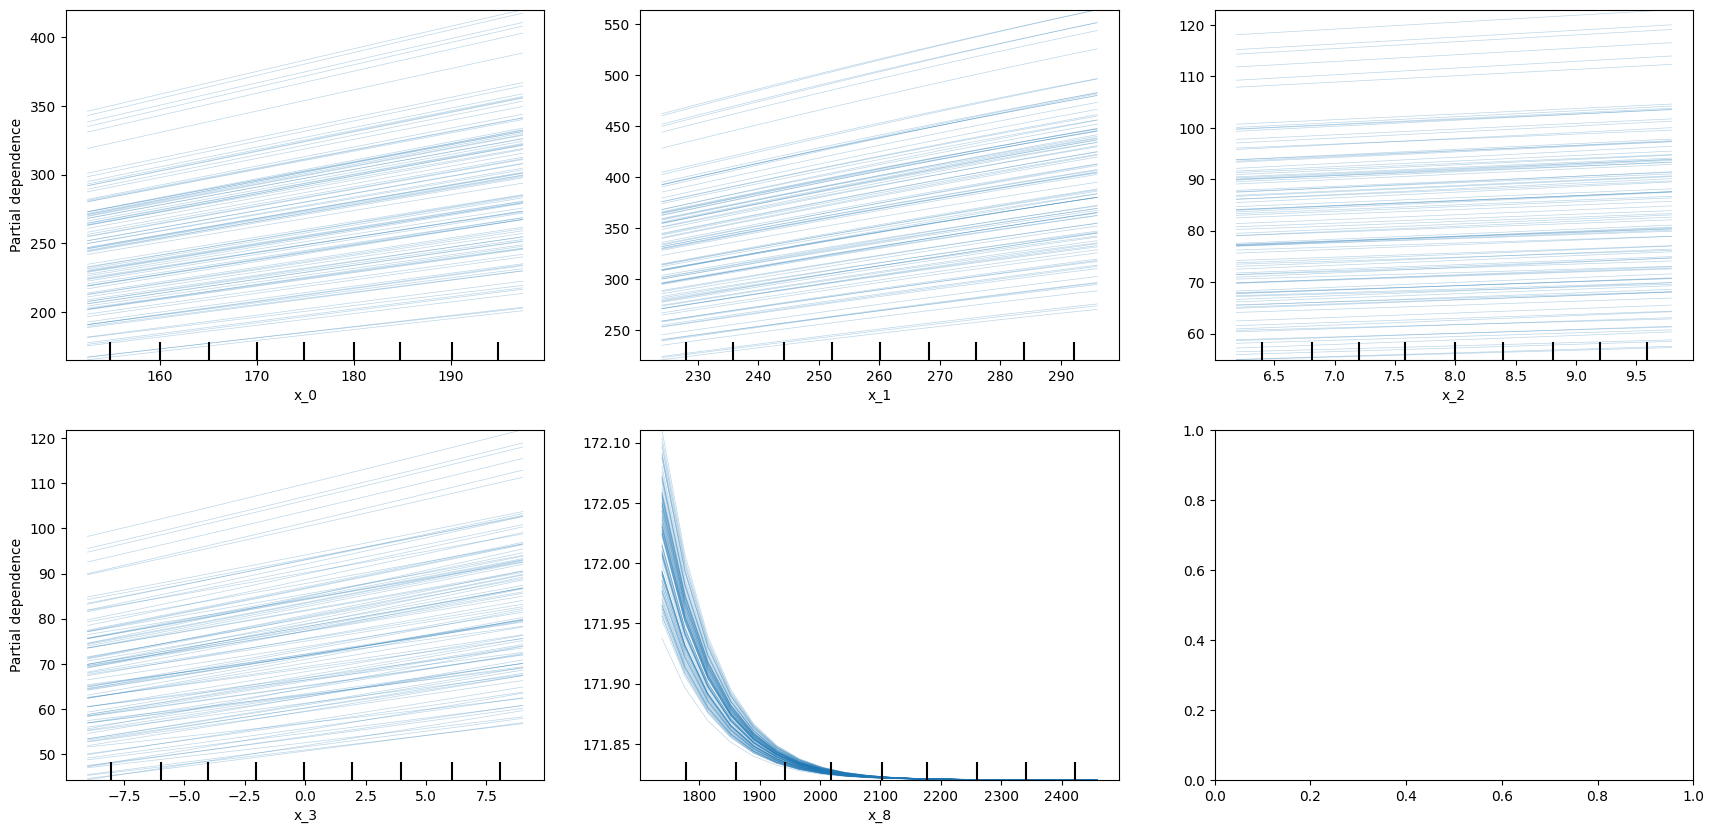

In [7]:
model = kriging_model
features = [0, 1, 2, 3, 8, (0, 8)]
pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind="individual")

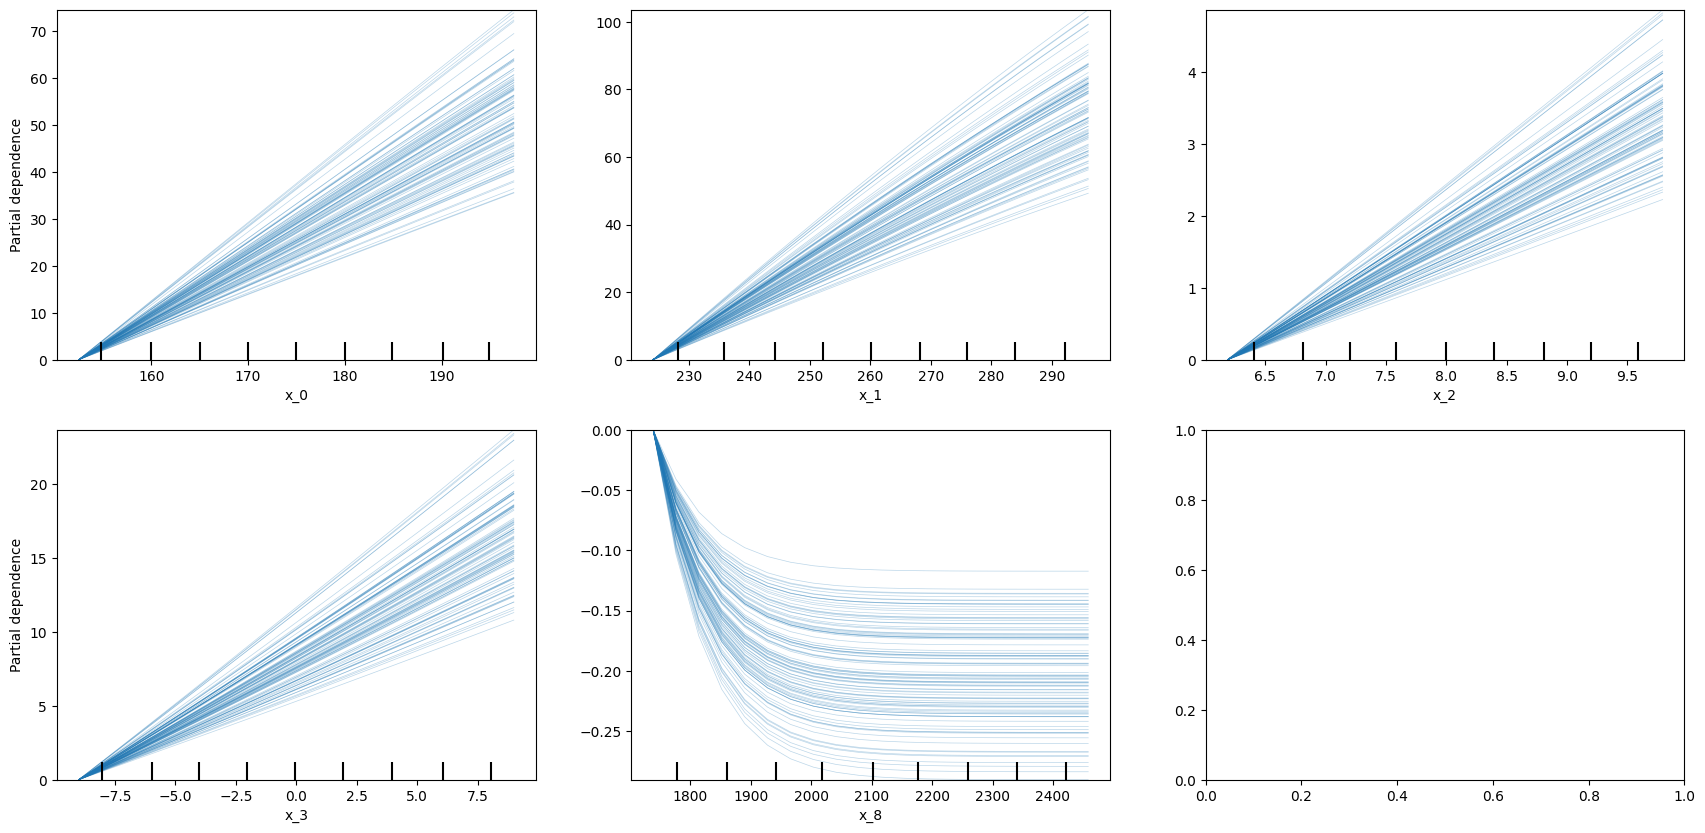

In [8]:
model = kriging_model
features = [0, 1, 2, 3, 8, (0, 8)]
pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind="individual",
                                                     centered=True)